Christian Sutton  
Module 4   
9/27/20   
  

# Problem 1
**[70 pts] By using at least 4 classifiers and 5 different hyper-parameter settings for each, generate operating points and plot them on ROC. Do not hesitate to use/modify the ROC plot code in the module notebook. In case you do not see enough variety in Pd-Pf you might need to work on the classifiers set and/or hyper parameters. And do not hesitate to try hundreds if necessary, since the ROC is just a natural scatter plot. (Recommend linear SVM, RBF SVM, logistic regression, random forest, etc.)**  

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
Mdata = pd.read_csv("C:/Users/physi/Desktop/AppliedMachineLearning_EN.705.601/mod4/assignment04_mushroom_dataset.csv")

In [2]:
Mdata.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#checking info of features
Mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [4]:
#Checking Unique values
for col in Mdata.columns:
    if Mdata[col].dtype == np.object:
        print(col, Mdata[col].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat     ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [5]:
# how many "?" in stalk-root
count = 0
for i in range(0,8124):
    if(Mdata.iloc[i,11]== "?"):
        count+=1
print(count)

2480


In [6]:
# drop stalk-root split data into X,Y too many missing values
Mdata = Mdata.drop(["stalk-root"], axis =1)

#OneHotEncode all category features 
Mdata1 =pd.get_dummies(Mdata)

In [7]:
# clean data of redundant features from oneHotEncoding

#list(Mdata1.columns)
Mdata1=Mdata1.drop(["class_e","cap-shape_b","cap-surface_s","cap-color_n","bruises_f","odor_p","gill-attachment_f","gill-spacing_c",\
                  "gill-size_n","gill-color_k","stalk-shape_e","stalk-surface-above-ring_s","stalk-surface-below-ring_s","stalk-color-above-ring_w",\
                  "stalk-color-below-ring_w","veil-color_w","ring-number_o","ring-type_p","spore-print-color_k","population_s","habitat    _u"],axis =1)

In [8]:
# split data target, train 
Y, X = Mdata1.iloc[:,0], Mdata1.iloc[:,1:]

In [9]:
# Training and testing datasets
#### NOTE WHAT FOLLOWS IS BASED ON 98.8% TEST SIZE, this was done for better graphing and more ROC points that vary
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.998, random_state=10)

In [10]:
# Parameter to vary for classifers
A = (2e-1, 0.5, 0.8, 1, 2, 5, 1e1, 5e1, 1e2)
B = (1, 3, 8, 15, 20, 50, 1e2, 5e2, 1e3)
C = (1, 3, 8, 15, 20, 50, 1e2, 5e2, 1e3)
D = (1e-3,1e-2, 1e-1, 1e0, 2, 5, 1e1, 5e1, 1e2)


FPR1, TPR1,FPR2, TPR2,FPR3, TPR3,FPR4, TPR4 = [],[],[],[],[],[],[],[]



In [11]:
#logistic regression -note bad test train split must bt used to make the plotted points different
print("Logistic Regression")
for c in A:
    pipe_l1 = make_pipeline(StandardScaler(),
                            LogisticRegression(random_state=10,
                                               penalty='l1',
                                               solver='liblinear',
                                               class_weight='balanced',
                                               C=c,
                                               multi_class='auto',
                                               max_iter=100))
    pipe_l1.fit(X_train, y_train)
    y_pred = pipe_l1.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR1 += [tp/(tp+fn)]  # Pd
    FPR1 += [fp/(fp+tn)]  # Pf
   
    print(f'Test Accuracy= {pipe_l1.score(X_test, y_test):.3f}, A={c:13.5f}, TPR1 {TPR1[-1]:.3f}, FPR1 {FPR1[-1]:.3f}')
print("")
print("RandomForest")
for i in B:
    pipe_l2 = make_pipeline(StandardScaler(),
                            RandomForestClassifier(int(i),random_state=10))
    pipe_l2.fit(X_train, y_train)
    y_pred = pipe_l2.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR2 += [tp/(tp+fn)]  # Pd
    FPR2 += [fp/(fp+tn)]  # Pf
    print(f'Test Accuracy= {pipe_l2.score(X_test, y_test):.3f}, B={i:13.5f}, TPR2 {TPR2[-1]:.3f}, FPR2 {FPR2[-1]:.3f}')
print("")
print("MLP classifier")    
for i in C:
    pipe_l3 = make_pipeline(StandardScaler(),
                            MLPClassifier(int(i),random_state=10, solver='adam', n_iter_no_change= 100))
    pipe_l3.fit(X_train, y_train)
    y_pred = pipe_l3.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR3 += [tp/(tp+fn)]  # Pd
    FPR3 += [fp/(fp+tn)]  # Pf
    print(f'Test Accuracy= {pipe_l3.score(X_test, y_test):.3f}, C={i:13.5f}, TPR3 {TPR3[-1]:.3f}, FPR3 {FPR3[-1]:.3f}')
    
print("")
print("SVM - SVC")    
for i in D:
    pipe_l4 = make_pipeline(StandardScaler(),
                            LinearSVC(C=i,random_state=10,))
    pipe_l4.fit(X_train, y_train)
    y_pred = pipe_l3.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR4 += [tp/(tp+fn)]  # Pd
    FPR4 += [fp/(fp+tn)]  # Pf
    print(f'Test Accuracy= {pipe_l4.score(X_test, y_test):.3f}, D={i:13.5f}, TPR4 {TPR4[-1]:.3f}, FPR4 {FPR4[-1]:.3f}')


Logistic Regression
Test Accuracy= 0.604, A=      0.20000, TPR1 0.984, FPR1 0.750
Test Accuracy= 0.911, A=      0.50000, TPR1 0.908, FPR1 0.086
Test Accuracy= 0.911, A=      0.80000, TPR1 0.908, FPR1 0.086
Test Accuracy= 0.907, A=      1.00000, TPR1 0.899, FPR1 0.086
Test Accuracy= 0.916, A=      2.00000, TPR1 0.899, FPR1 0.069
Test Accuracy= 0.916, A=      5.00000, TPR1 0.899, FPR1 0.069
Test Accuracy= 0.916, A=     10.00000, TPR1 0.899, FPR1 0.069
Test Accuracy= 0.962, A=     50.00000, TPR1 0.982, FPR1 0.057
Test Accuracy= 0.962, A=    100.00000, TPR1 0.982, FPR1 0.057

RandomForest
Test Accuracy= 0.778, B=      1.00000, TPR2 0.868, FPR2 0.307
Test Accuracy= 0.922, B=      3.00000, TPR2 0.883, FPR2 0.043
Test Accuracy= 0.909, B=      8.00000, TPR2 0.836, FPR2 0.023
Test Accuracy= 0.896, B=     15.00000, TPR2 0.896, FPR2 0.105
Test Accuracy= 0.894, B=     20.00000, TPR2 0.911, FPR2 0.122
Test Accuracy= 0.868, B=     50.00000, TPR2 0.917, FPR2 0.178
Test Accuracy= 0.854, B=    100.0000

C:\Users\physi\Anaconda4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\physi\Anaconda4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Test Accuracy= 0.685, C=      3.00000, TPR3 0.875, FPR3 0.493
Test Accuracy= 0.685, C=      8.00000, TPR3 0.914, FPR3 0.529


C:\Users\physi\Anaconda4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\physi\Anaconda4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Test Accuracy= 0.812, C=     15.00000, TPR3 0.906, FPR3 0.276
Test Accuracy= 0.716, C=     20.00000, TPR3 0.963, FPR3 0.514

C:\Users\physi\Anaconda4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\physi\Anaconda4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Test Accuracy= 0.718, C=     50.00000, TPR3 0.927, FPR3 0.477


C:\Users\physi\Anaconda4\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Test Accuracy= 0.801, C=    100.00000, TPR3 0.922, FPR3 0.312
Test Accuracy= 0.740, C=    500.00000, TPR3 0.951, FPR3 0.456
Test Accuracy= 0.738, C=   1000.00000, TPR3 0.945, FPR3 0.454

SVM - SVC
Test Accuracy= 0.787, D=      0.00100, TPR4 0.945, FPR4 0.454
Test Accuracy= 0.792, D=      0.01000, TPR4 0.945, FPR4 0.454
Test Accuracy= 0.779, D=      0.10000, TPR4 0.945, FPR4 0.454
Test Accuracy= 0.777, D=      1.00000, TPR4 0.945, FPR4 0.454
Test Accuracy= 0.777, D=      2.00000, TPR4 0.945, FPR4 0.454
Test Accuracy= 0.776, D=      5.00000, TPR4 0.945, FPR4 0.454
Test Accuracy= 0.776, D=     10.00000, TPR4 0.945, FPR4 0.454
Test Accuracy= 0.776, D=     50.00000, TPR4 0.945, FPR4 0.454
Test Accuracy= 0.776, D=    100.00000, TPR4 0.945, FPR4 0.454


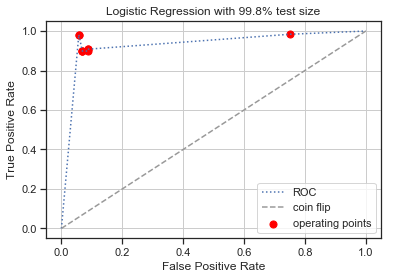

In [12]:
# Sorts the points to display nicely on ROC
FPR1, TPR1 = zip(*sorted(zip(FPR1, TPR1)))
fpr1 = [0.]+list(FPR1)+[1.]; tpr1 = [0.]+list(TPR1)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr1, tpr1, ':', label='ROC')
plt.scatter(FPR1, TPR1, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')


# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.title("Logistic Regression with 99.8% test size")
plt.show()

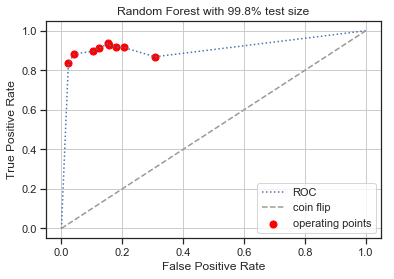

In [13]:
# Sorts the points to display nicely on ROC
FPR2, TPR2 = zip(*sorted(zip(FPR2, TPR2)))
fpr2 = [0.]+list(FPR2)+[1.]; tpr2 = [0.]+list(TPR2)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr2, tpr2, ':', label='ROC')
plt.scatter(FPR2, TPR2, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.title("Random Forest with 99.8% test size")
plt.show()

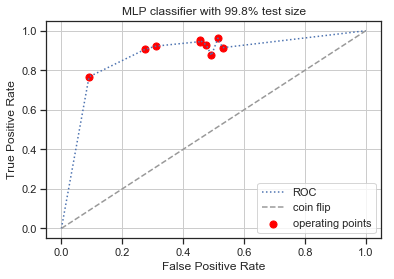

In [14]:
# Sorts the points to display nicely on ROC
FPR3, TPR3 = zip(*sorted(zip(FPR3, TPR3)))
fpr3 = [0.]+list(FPR3)+[1.]; tpr3 = [0.]+list(TPR3)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr3, tpr3, ':', label='ROC')
plt.scatter(FPR3, TPR3, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.title("MLP classifier with 99.8% test size")
plt.show()

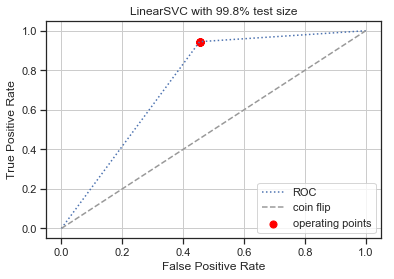

In [15]:
# Sorts the points to display nicely on ROC
FPR4, TPR4 = zip(*sorted(zip(FPR4, TPR4)))
fpr4 = [0.]+list(FPR4)+[1.]; tpr4 = [0.]+list(TPR4)+[1.]

# Plot
fig, ax = plt.subplots()
plt.plot(fpr4, tpr4, ':', label='ROC')
plt.scatter(FPR4, TPR4, 50, color='red', marker='o', label='operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# # Annotate certain operating points
# annot(1, fpr[1], tpr[1])
# annot(2, fpr[4], tpr[4])
# annot(3, fpr[8], tpr[8])
# annot(4, fpr[9], tpr[9])

# Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.title("LinearSVC with 99.8% test size")
plt.show()

# Problem 2
**[10 pts] What kind of behavior would you expect to see in Pd – Pf interaction of an ROC plot? Do you see it in yours?**  
As the parameters of the classifier are varied the data points should move around the ROC Graph. Movement in the ROC graph results in trade-offs between detection (Pd) and false alarm (Pf). Depending on application, such as cancer detection or poison detection, the highest Pd might be desired irregardless of Pf value. For some reason, no matter the "C" value used by linearSVC there isn't any movement in the operating point on the ROC graph. However, the other graphs do show some movement given the non-ideal test/train split. 

# Problem 3

**[20 pts] From the ROC plot that you created make a selection of the classifier and hyper-parameter setting for this problem. Note that we are classifying mushrooms so your conclusion might be subjective but has to be supported by your findings.**

Let me point out that since I've set the test split a 99.8% this isn't an ideal case, actually far from ideal. However, given that statement, I would choose the Logistic regression classifier with the operating point of (Test Accuracy= 0.604, A=0.20000, TPR1 0.984, FPR1 0.750) where A= the hyperparameter C and this produces the highest TRP & FPR. This is helpful in dectecting every possible case of poison mushrooms. 